# Stroke predicition

In this project, we use the dataset to predict who is likely to have a stroke by using the information like age, gender, bmi, smoking status and the other diseases.

The information of each column is provided below. 

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
12) stroke: 1 if the patient had a stroke or 0 if not


Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Exploratory Data Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

We now first discovering by using head and shape.

In [3]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
df.shape

(5110, 12)

In this dataset, there are 12 columns and 5110 rows. Next, we need some descriptive statistics on this dataset.

In [5]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In the 'gender' column, there are 3 unique values, Male, Female, and Other. The average age of these observation is around 43 years old. Most of the patient are never smoke before. The average glucose level and bmi among all of the patients are 106.147677 and 28.893237, respectively.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We can see that in the 'bmi' column, there are some value missing. In the further regression, we will delete the row with these value missing.

In [7]:
df.duplicated().value_counts()

False    5110
dtype: int64

There are no duplicate in this dataset.

In [8]:
df['stroke'].value_counts(normalize=True)*100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

We can see that only 4% of the dataset are the people who have got stroke, which is too imbalanced.

In [9]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

We can see that 2994 patients are female, and 2115 are males, but notice that there are one other gender. Let's check what is it.

In [10]:
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


Since this row of this dataset does not have any value that is seriously have negative effect of this data, we can leave this data by do not delete it.\ Now, we plot the histogram on the age distribution to see how is the dataset observed.

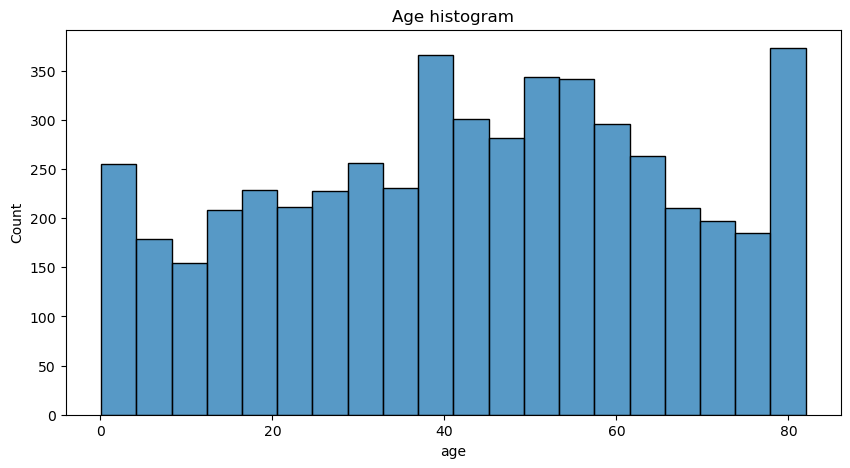

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['age'])
plt.title('Age histogram');

We observe that this data collect all patients in all range of ages. Next, we plot a boxplot to see if there is any outliers here.

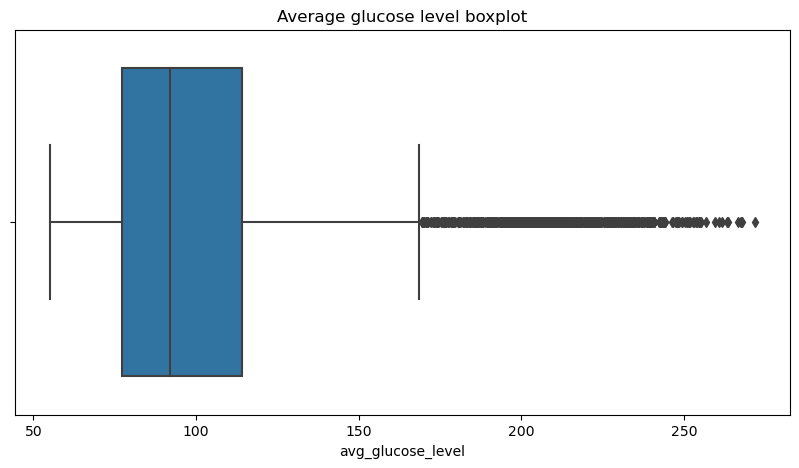

In [12]:
plt.figure(figsize=(10,5))
plt.title('Average glucose level boxplot')
sns.boxplot(x=df['avg_glucose_level']);

And check outliers for bmi.

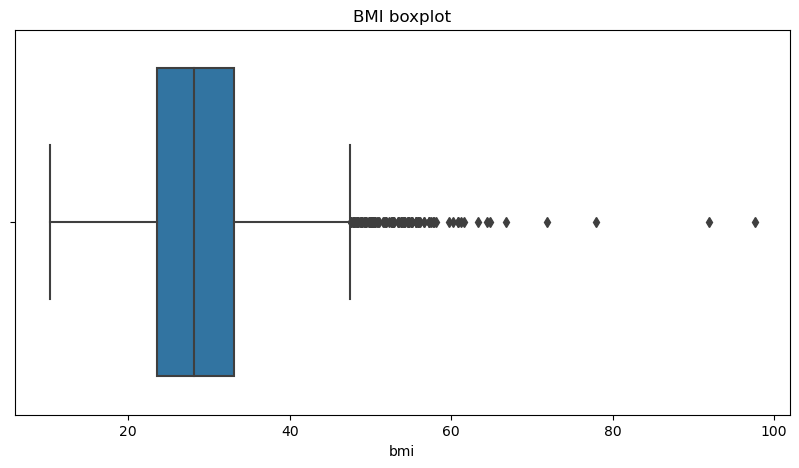

In [13]:
plt.figure(figsize=(10,5))
plt.title('BMI boxplot')
sns.boxplot(x=df['bmi']);

There are some values that are maybe too high, so we observe these values whether it is possible to have these highly bmi.

In [14]:
high_bmi = df[df['bmi'] >= 65]
high_bmi

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
1559,37759,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


We have a question on these outliers. We need to think that these outliers may be affect when we do a regression model. We will consider it later.


Below are the three plots of the relationship between average glucose level, bmi, and stroke.

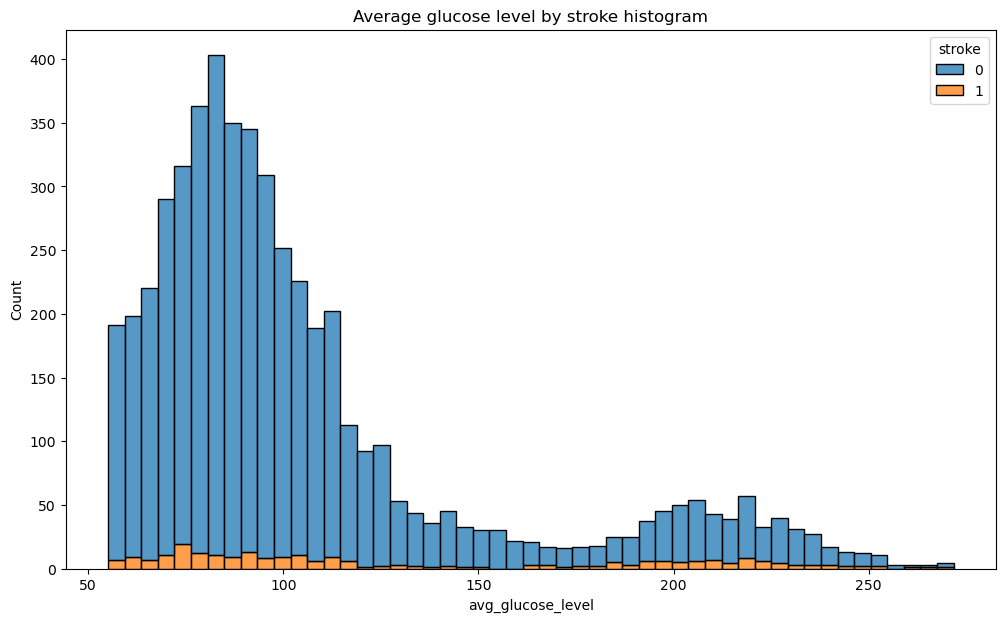

In [15]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='avg_glucose_level', hue='stroke', multiple='stack')
plt.title('Average glucose level by stroke histogram');

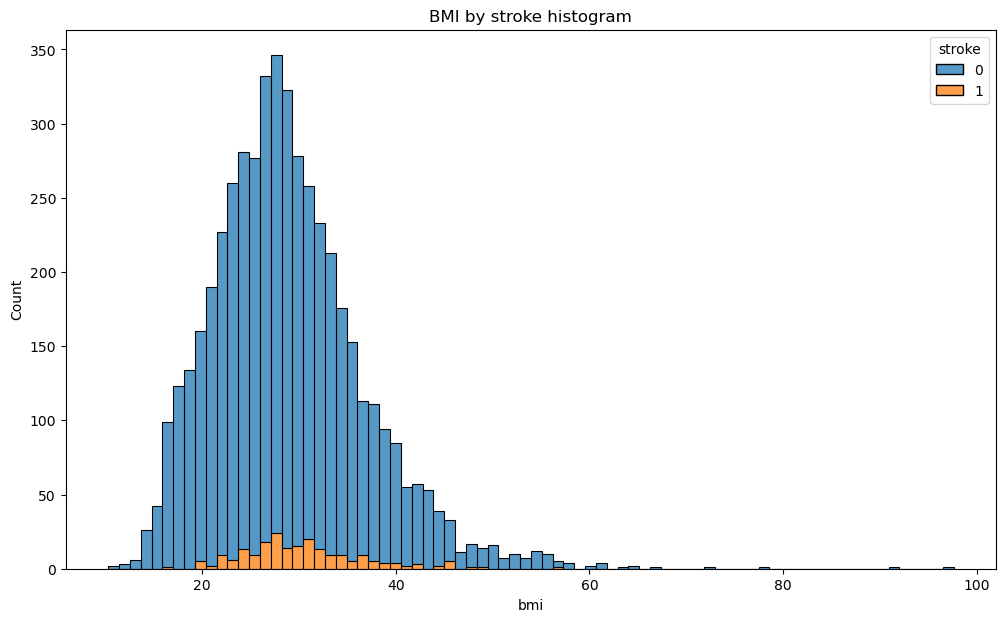

In [16]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='bmi', hue='stroke', multiple='stack')
plt.title('BMI by stroke histogram');

We can see that both plots are in the bell-shape, that means the dataset we observed have a normal distribution.


Belows are the pie charts show the percentage of categorical variables.

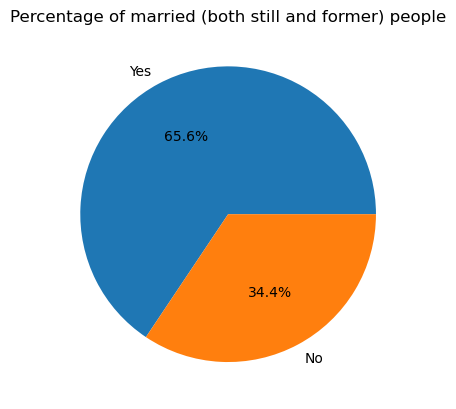

In [17]:
plt.pie(df['ever_married'].value_counts(), labels=df['ever_married'].unique(), autopct='%1.1f%%');
plt.title('Percentage of married (both still and former) people');

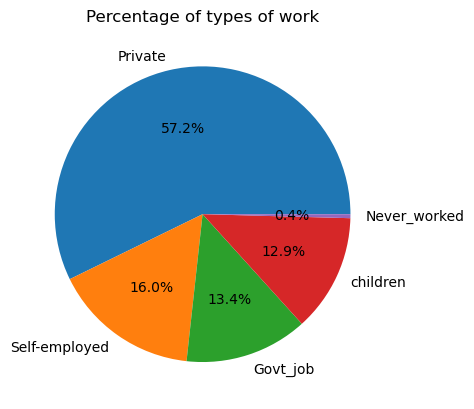

In [18]:
plt.pie(df['work_type'].value_counts(), labels=df['work_type'].unique(), autopct='%1.1f%%');
plt.title('Percentage of types of work');

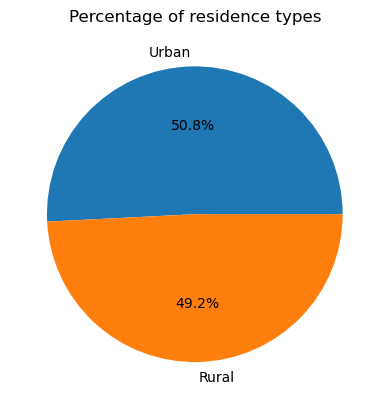

In [19]:
plt.pie(df['Residence_type'].value_counts(), labels=df['Residence_type'].unique(), autopct='%1.1f%%');
plt.title('Percentage of residence types');

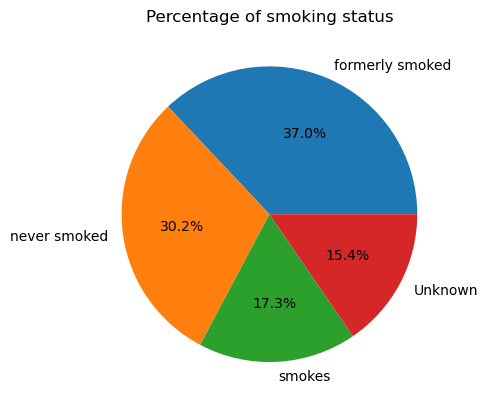

In [20]:
plt.pie(df['smoking_status'].value_counts(), labels=df['smoking_status'].unique(), autopct='%1.1f%%');
plt.title('Percentage of smoking status');

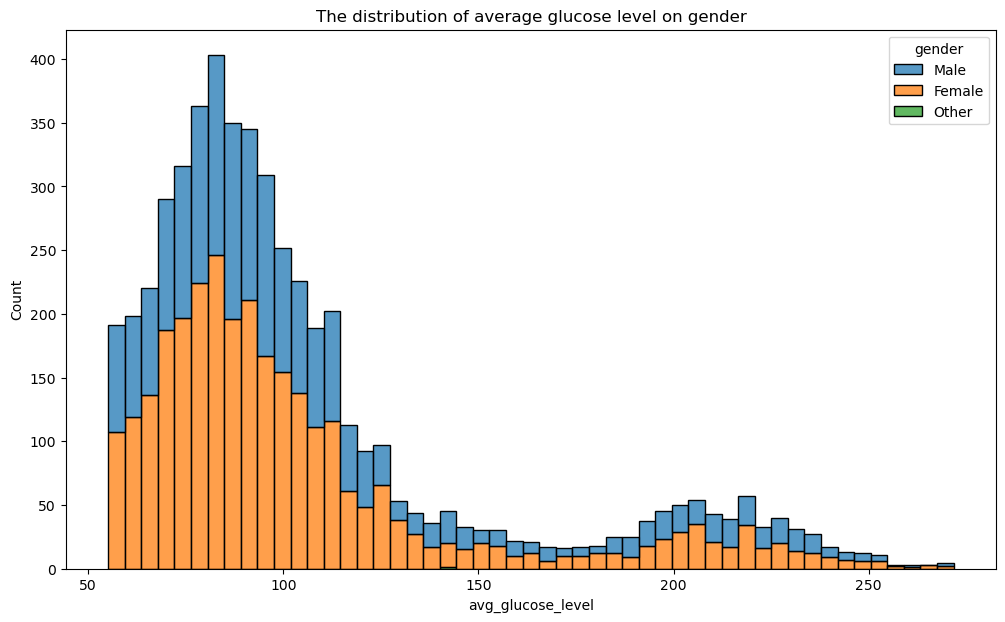

In [21]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='avg_glucose_level', hue='gender', multiple='stack')
plt.title('The distribution of average glucose level on gender');

Both genders have the same normal distribution of average glucose level.

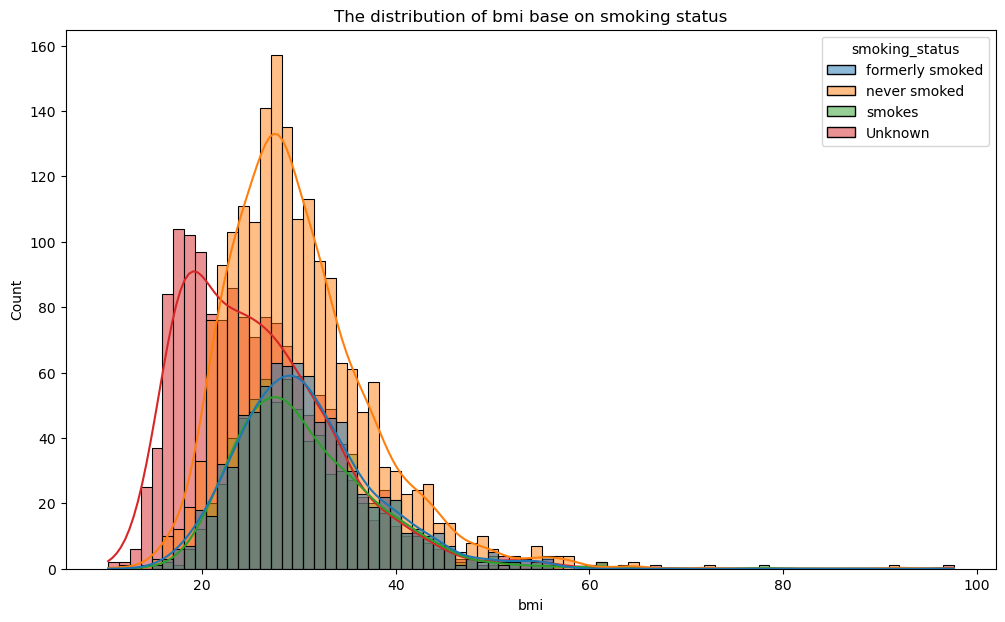

In [22]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='bmi', hue='smoking_status', multiple='layer', kde=True)
plt.title('The distribution of bmi base on smoking status');

There is a difference on the distribution of bmi between unknown group and the others, and there is a bit difference on the left three group with each other.

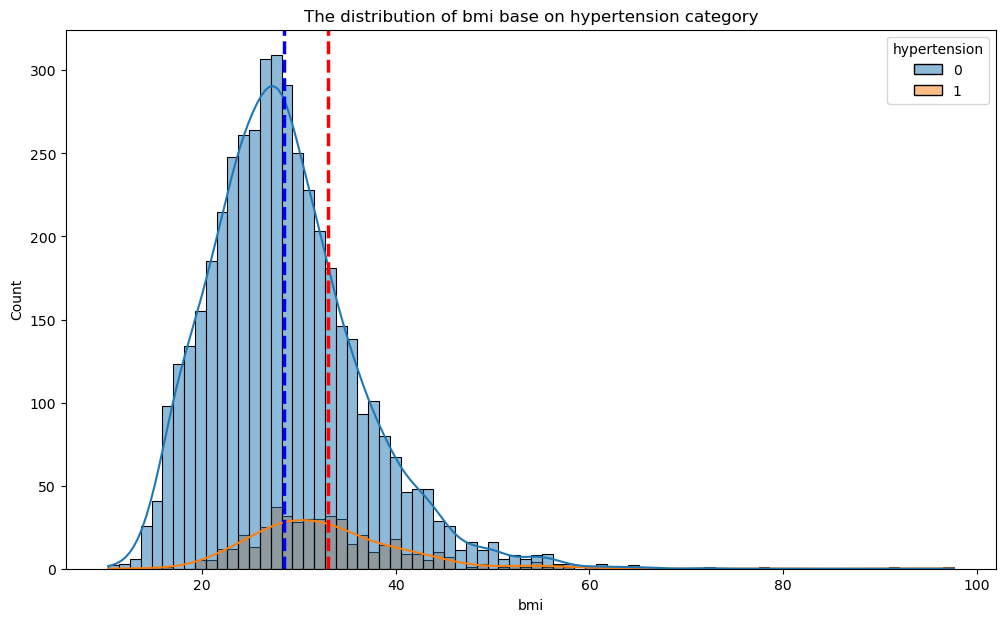

In [23]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='bmi', hue='hypertension', multiple='layer', kde=True)
plt.title('The distribution of bmi base on hypertension category');
plt.axvline(x=df[df['hypertension'] == 1].bmi.mean(), color='red', ls='--', lw=2.5);
plt.axvline(x=df[df['hypertension'] == 0].bmi.mean(), color='blue', ls='--',lw=2.5);

A little bit difference of mean between both group of who have got hypertension has shown.


The below scatter plot shows the relationship between average glucose level and bmi. We can see that most of the data are clustered around the bottom left of the plot.

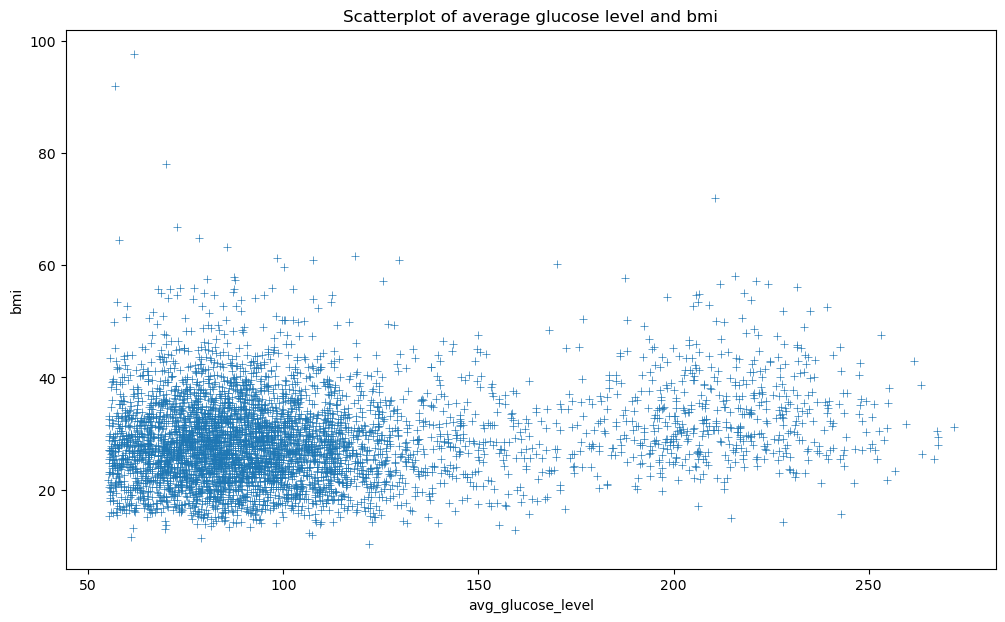

In [24]:
plt.figure(figsize=(12,7))
ax = sns.scatterplot(data=df, x='avg_glucose_level', y='bmi', marker="+")
plt.title('Scatterplot of average glucose level and bmi');

Three assumptions that may be affect how stroke will be occur are hypertension, heart disease and smoking status. We will observe the percentage of stroke categorized by these causes.

In [25]:
df.groupby(['hypertension', 'heart_disease'])[['stroke']].sum()

stroke
hypertension heart_disease        
0            0                 149
             1                  34
1            0                  53
             1                  13

It is interesting that although the patients have no hypertension and heart disease, stroke still can be occurred with highly values.


Now, consider on the people who have got stroke. We plot to see the distribution of age among all of these group of stroke.

In [26]:
strokep = df[df['stroke'] == 1]
strokep.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
strokep['stroke'].count()

249

There are 249 people that have got stroke.

In [28]:
strokep.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,209.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,6.329452,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,26.400000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,29.700000,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


Around 27% of people who have stroke and 19% who have stroke have got hypertension and heart disease, respectively.

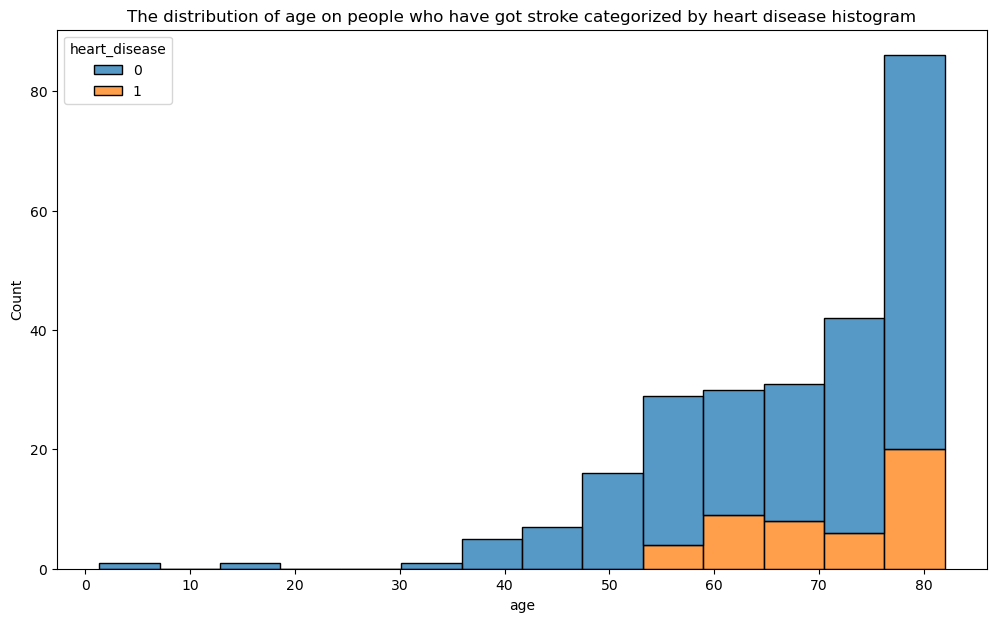

In [29]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=strokep, x='age', hue='heart_disease', multiple='stack')
plt.title('The distribution of age on people who have got stroke categorized by heart disease histogram');

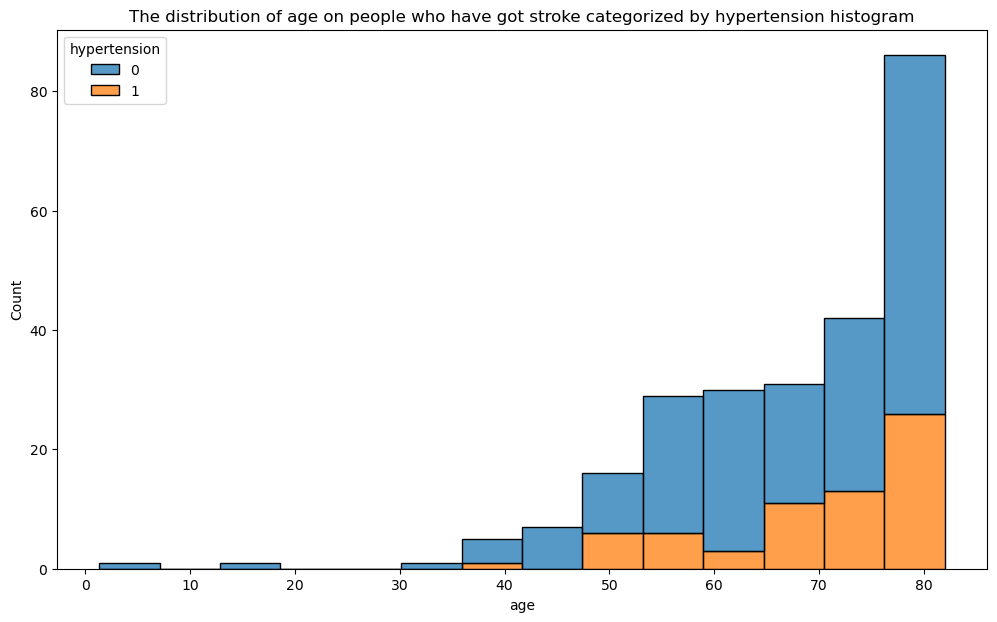

In [30]:
plt.figure(figsize=(12,7))
ax = sns.histplot(data=strokep, x='age', hue='hypertension', multiple='stack')
plt.title('The distribution of age on people who have got stroke categorized by hypertension histogram');

We can see from this graph that if the age is higher than 50, more likely to have a stroke. Moreover, many people who have stroke also have hypertension and heart disease.

Lastly, we plot the correlation heatmap to show whether the variables are correlated to each other.

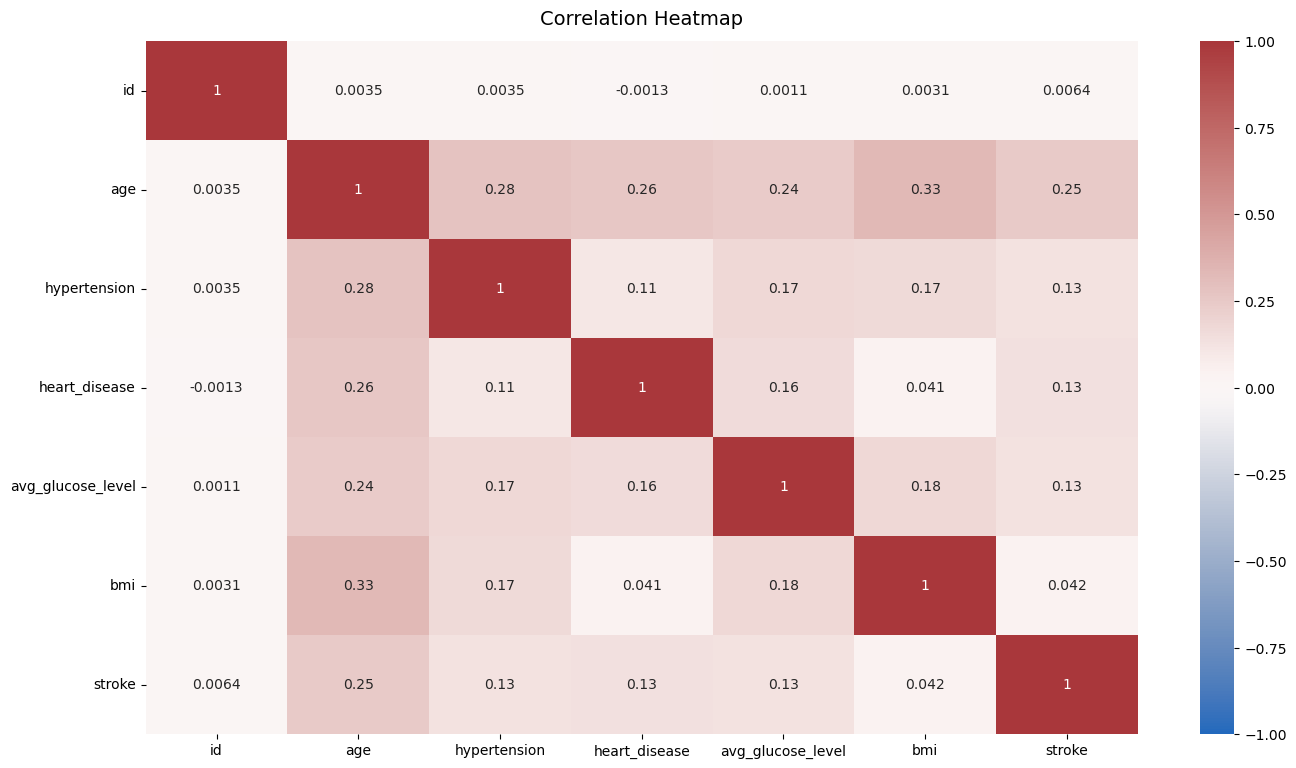

In [31]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

As we can see, the most impact variable that affect on the three causes assumption, stroke and bmi is age variable. Below we plot the scatter plot on the bmi and average glucose level variables.

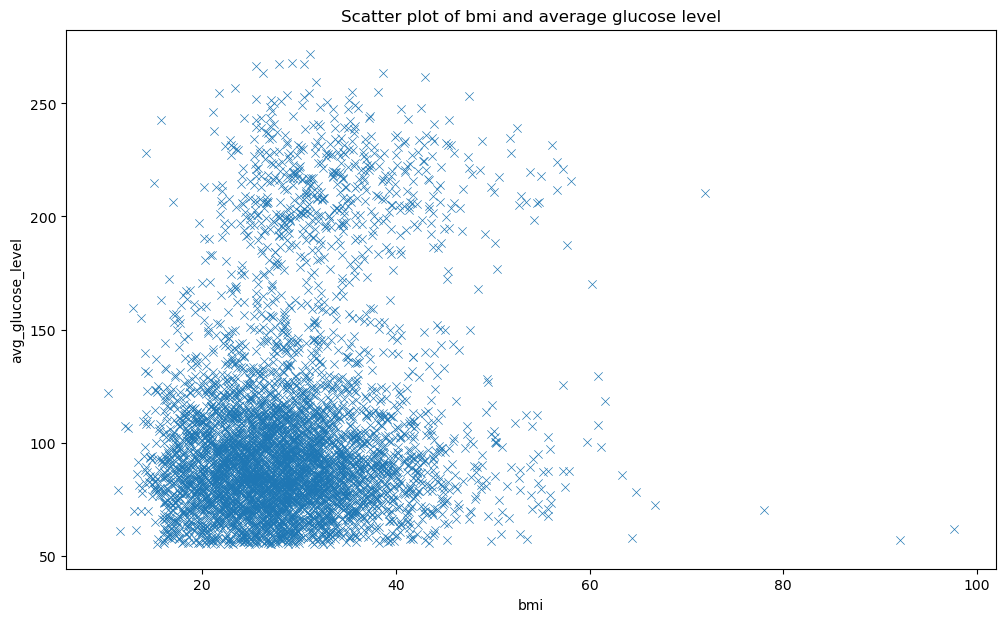

In [32]:
plt.figure(figsize=(12,7))
ax = sns.scatterplot(data=df, x='bmi', y='avg_glucose_level', marker="x")
plt.title('Scatter plot of bmi and average glucose level');

# Logistic Regression

In [33]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

We fist drop irrelevant column (id) before we make the model.

In [34]:
df_subset = df.drop(['id'], axis = 1).dropna(axis=0).reset_index(drop = True)

Then we use get_dummies to get the numeric data for each categorical variables.

In [35]:
df_subset = pd.get_dummies(df_subset, drop_first=False)
df_subset

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,13.0,0,0,103.08,18.6,0,1,0,0,1,...,0,0,0,1,1,0,1,0,0,0
4905,81.0,0,0,125.20,40.0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4906,35.0,0,0,82.99,30.6,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4907,51.0,0,0,166.29,25.6,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


After that, we use under-sample method to sample the imbalance datas. Then we split into train and test data.

In [36]:
X = df_subset.drop(columns=['stroke'])
y = df_subset['stroke']

undersample = RandomUnderSampler(sampling_strategy=0.6)
X_sampled, y_sampled = undersample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled,test_size=0.25,random_state=42)

We make pipeline to scaling data first, then we put in the logistic regression model.

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [38]:
print('The coefficients are: ', pipe[1].coef_)
print('The y-intercept is: ', pipe[1].intercept_)

The coefficients are:  [[ 2.00100599  0.29095434  0.27106607  0.11636933  0.26401895  0.06723258
  -0.06723258  0.          0.00620165 -0.00620165 -0.07434565 -0.09032274
   0.01653071 -0.27152233  0.51586785 -0.08910167  0.08910167 -0.07781437
   0.15470626 -0.10254899  0.05232245]]
The y-intercept is:  [-0.87922006]


Now we make a prediction on the test variable.

In [39]:
y_pred = pipe.predict(X_test)

These show all the prediction values.

In [40]:
print(y_pred)

[0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1
 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1]


And show the probability of all predictions.

In [41]:
pipe.predict_proba(X_test)

array([[0.87173989, 0.12826011],
       [0.51132602, 0.48867398],
       [0.90315587, 0.09684413],
       [0.98074922, 0.01925078],
       [0.17169097, 0.82830903],
       [0.07733612, 0.92266388],
       [0.7730856 , 0.2269144 ],
       [0.96781429, 0.03218571],
       [0.771649  , 0.228351  ],
       [0.98875299, 0.01124701],
       [0.89938169, 0.10061831],
       [0.38755417, 0.61244583],
       [0.95377054, 0.04622946],
       [0.72325503, 0.27674497],
       [0.83152562, 0.16847438],
       [0.78875568, 0.21124432],
       [0.99607402, 0.00392598],
       [0.8749996 , 0.1250004 ],
       [0.79309353, 0.20690647],
       [0.95255789, 0.04744211],
       [0.32508519, 0.67491481],
       [0.99088045, 0.00911955],
       [0.82256665, 0.17743335],
       [0.86362328, 0.13637672],
       [0.25322981, 0.74677019],
       [0.94730082, 0.05269918],
       [0.93959089, 0.06040911],
       [0.66621379, 0.33378621],
       [0.17343989, 0.82656011],
       [0.58451559, 0.41548441],
       [0.

These are 4 metrics of the prediction. We can see that there is 77% of accuracy, which means we can correctly predict the person whether have got stroke or not by 77 percents.

In [42]:
table = pd.DataFrame(data = {'Model': "Logistic Regression",
                          'F1': ["%.6f" % metrics.f1_score(y_test, y_pred)],
                          'Recall': ["%.6f" % metrics.recall_score(y_test, y_pred)],
                          'Precision': ["%.6f" % metrics.precision_score(y_test, y_pred)],
                          'Accuracy': ["%.6f" % metrics.accuracy_score(y_test, y_pred)]})
table

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.623656,0.630435,0.617021,0.750000


And below is the confusion matrix However, we have seen that from people who have stroke, there will be 108 people that we can correctly predict, but the remaining 18 are false negative, which seems to be a large number.

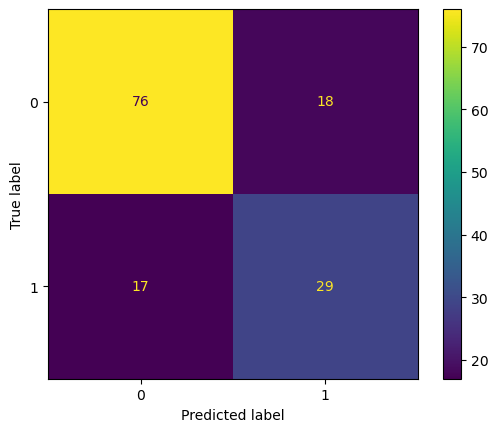

In [43]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = pipe[1].classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = pipe[1].classes_)
disp.plot()

We plot an ROC curve below, which shows that the prediction are likely to be just a random since AUC is only 0.57. So, we should find more other model to aim more accuracy and AUC.

In [44]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
def ROC_plot(clf,X_test):
  y_score = clf.predict_proba(X_test)
  fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
  roc_auc = auc(fpr, tpr)

  plt.figure(figsize=(12, 8))

  # ROC
  plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
  plt.xlim([-0.05, 1.05])
  plt.ylim([-0.05, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic (ROC)')
  plt.legend(loc='lower right')
  plt.show()

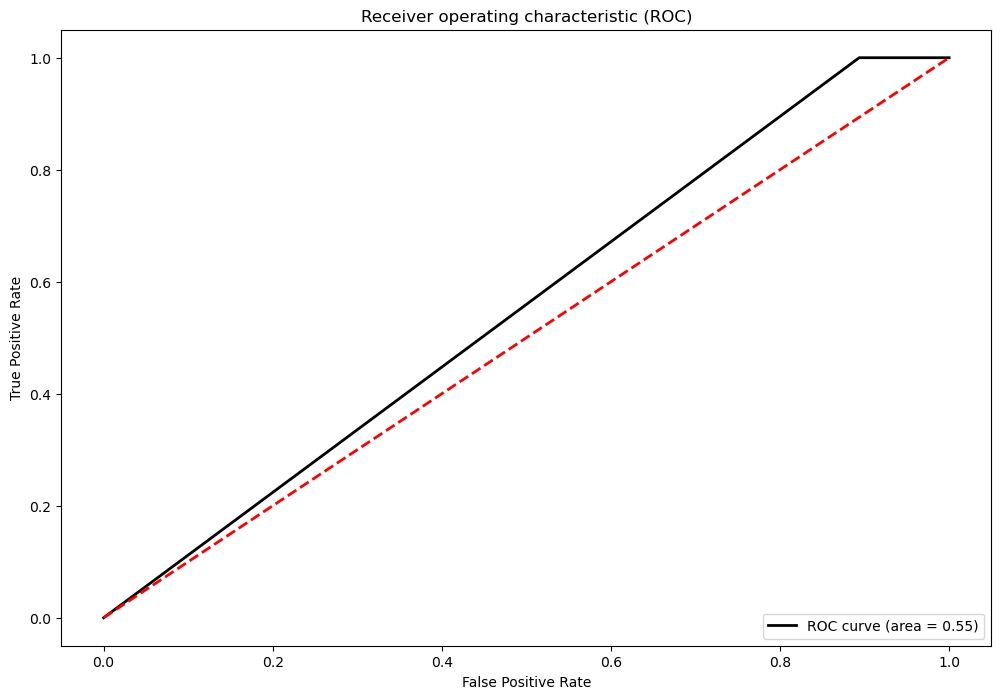

In [45]:
ROC_plot(pipe[1],X_test)

# Decision Tree Model

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

We set, fit, and predict the decision tree model.

In [47]:
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

Now we have the metric score as below. We can see that most of the metrics are drop from the logistic regression model.

In [48]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.714286
Precision: 0.553571
Recall: 0.673913
F1 Score: 0.607843


In [49]:
result_table1 = pd.DataFrame(data = {'Model': "Decision Tree",
                          'F1': ["%.6f" % metrics.f1_score(y_test, dt_pred)],
                          'Recall': ["%.6f" % metrics.recall_score(y_test, dt_pred)],
                          'Precision': ["%.6f" % metrics.precision_score(y_test, dt_pred)],
                          'Accuracy': ["%.6f" % metrics.accuracy_score(y_test, dt_pred)]})
table = pd.concat([table, result_table1], ignore_index=True)

We observe the confusion matrix below. We can see that false negative is quite big.

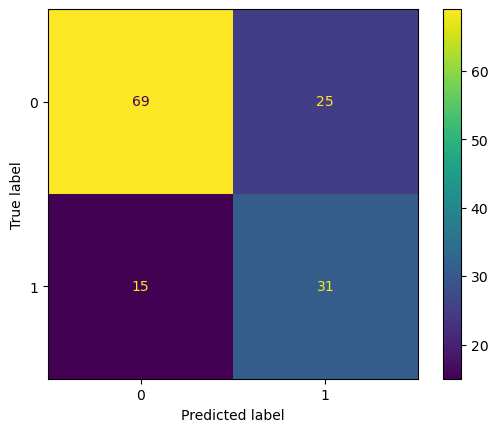

In [50]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

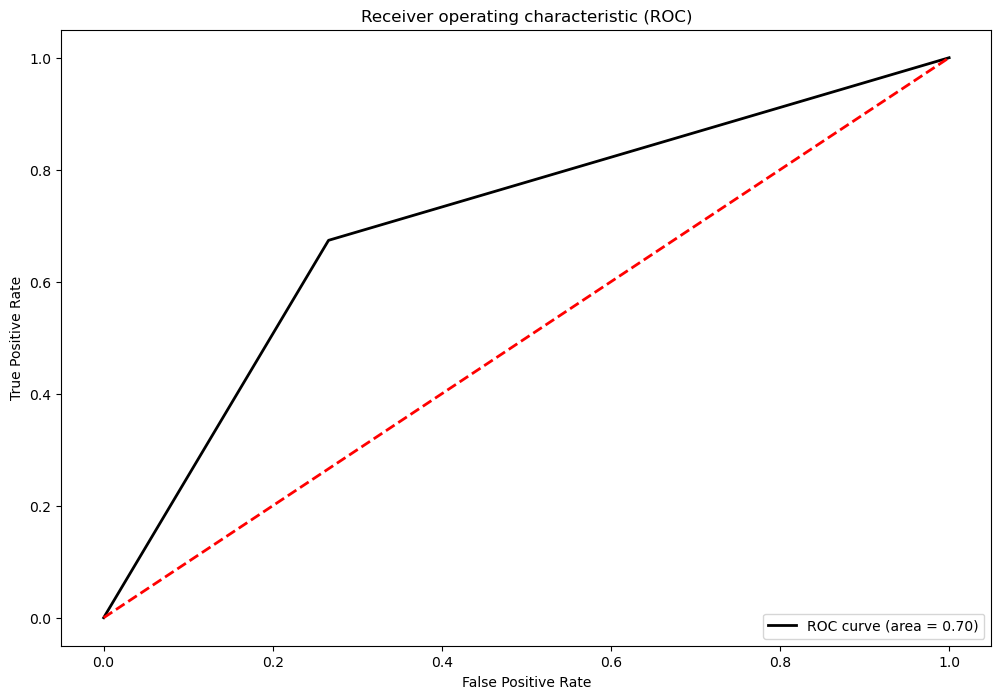

In [51]:
ROC_plot(decision_tree,X_test)

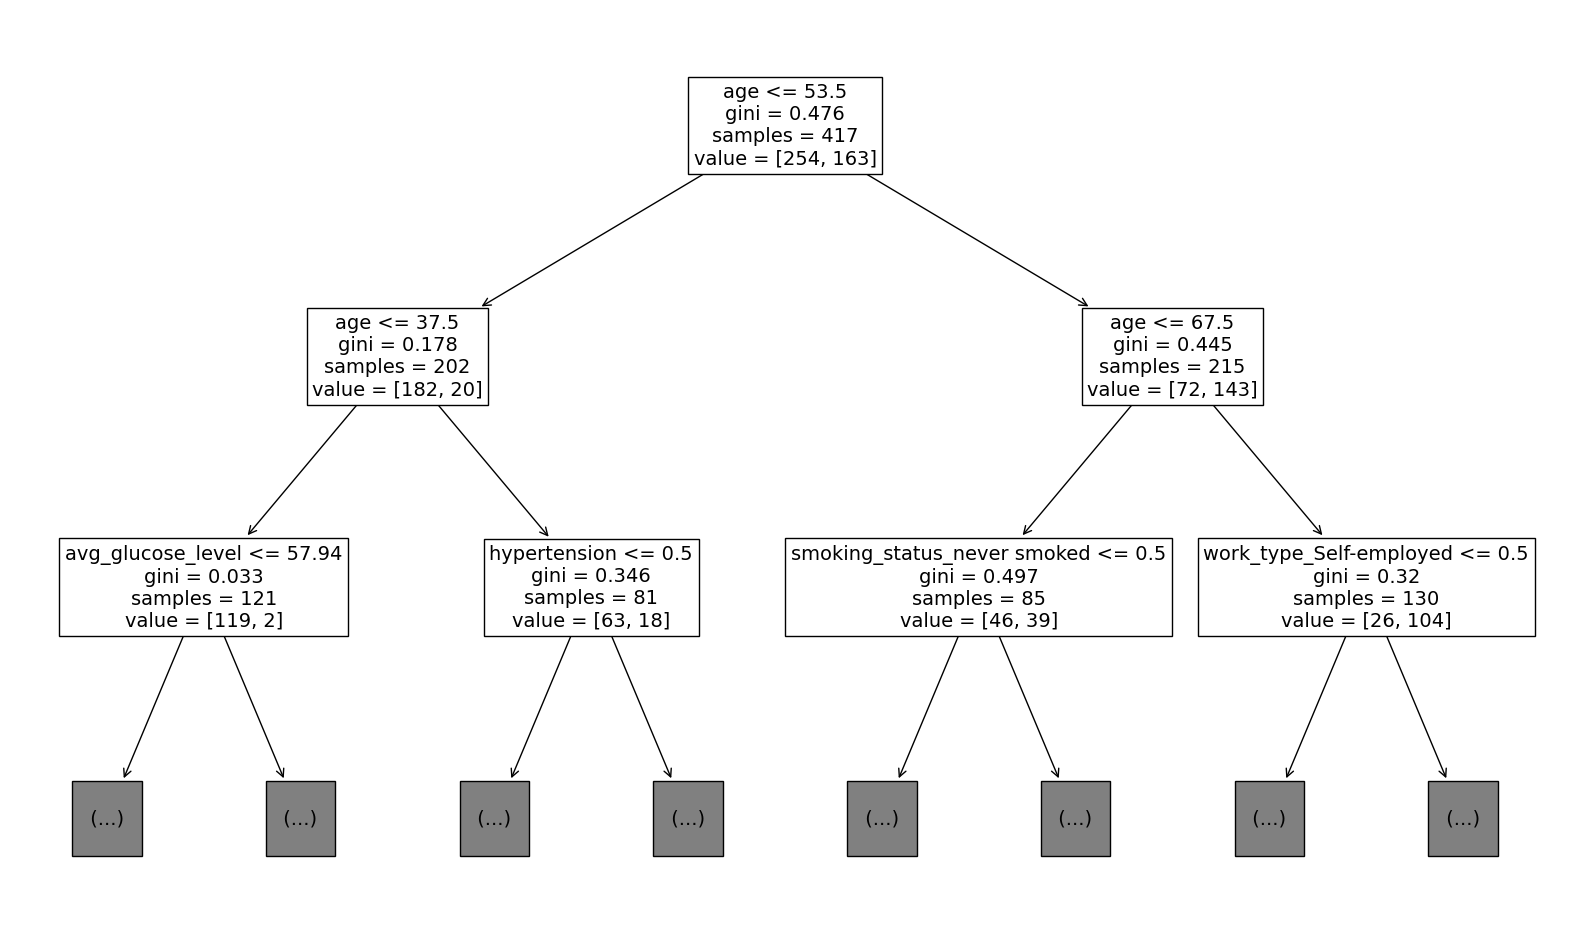

In [52]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns);

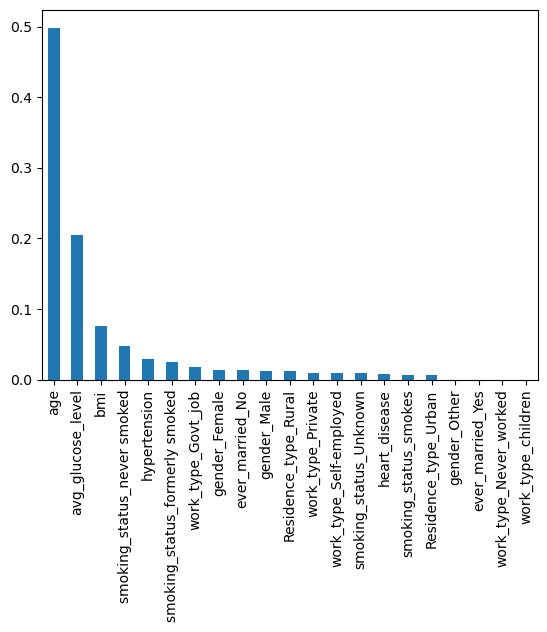

In [53]:
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import PredefinedSplit
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

We will set the amount of parameters for testing the cross validation.

In [56]:
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

In [57]:
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

Then we fit the random forest model.

In [58]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [59]:
rf_val = GridSearchCV(rf, cv_params, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

In [60]:
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [61]:
rf_val.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [62]:
rf_opt = RandomForestClassifier(max_depth = 10,
 max_features = 'sqrt',
 max_samples = 0.5,
 min_samples_leaf = 1,
 min_samples_split = 0.001,
 n_estimators = 50, random_state = 42, class_weight='balanced')

In [63]:
rf_opt.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_samples=0.5,
                       min_samples_split=0.001, n_estimators=50,
                       random_state=42)

In [64]:
y_pred = rf_opt.predict(X_test)

This model have high value of all metrics, which exceed more than 90% for each metric.

In [65]:
pc_test = precision_score(y_test, y_pred, pos_label = 0)
rc_test = recall_score(y_test, y_pred, pos_label = 0)
ac_test = accuracy_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred, pos_label = 0)

In [66]:
table = table.append({'Model': "Tuned Random Forest",
                        'F1':  f1_test,
                        'Recall': rc_test,
                        'Precision': pc_test,
                        'Accuracy': ac_test
                      },
                        ignore_index=True
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.623656,0.630435,0.617021,0.750000
1,Decision Tree,0.607843,0.673913,0.553571,0.714286
2,Tuned Random Forest,0.97008,0.987983,0.952815,0.942182


However, the false negative value are too high than the other model and it can find the true negative only 5 samples

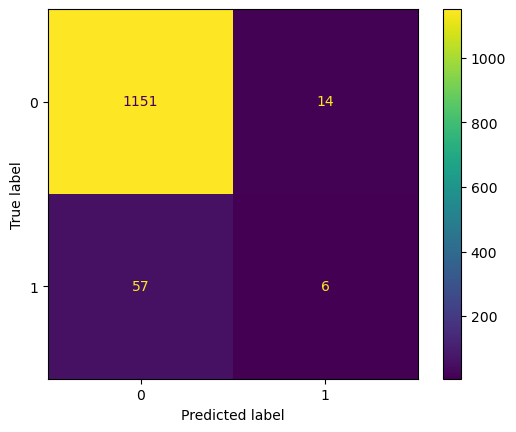

In [67]:
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

For this model, we have the AUC 0.82, which is fairly high.

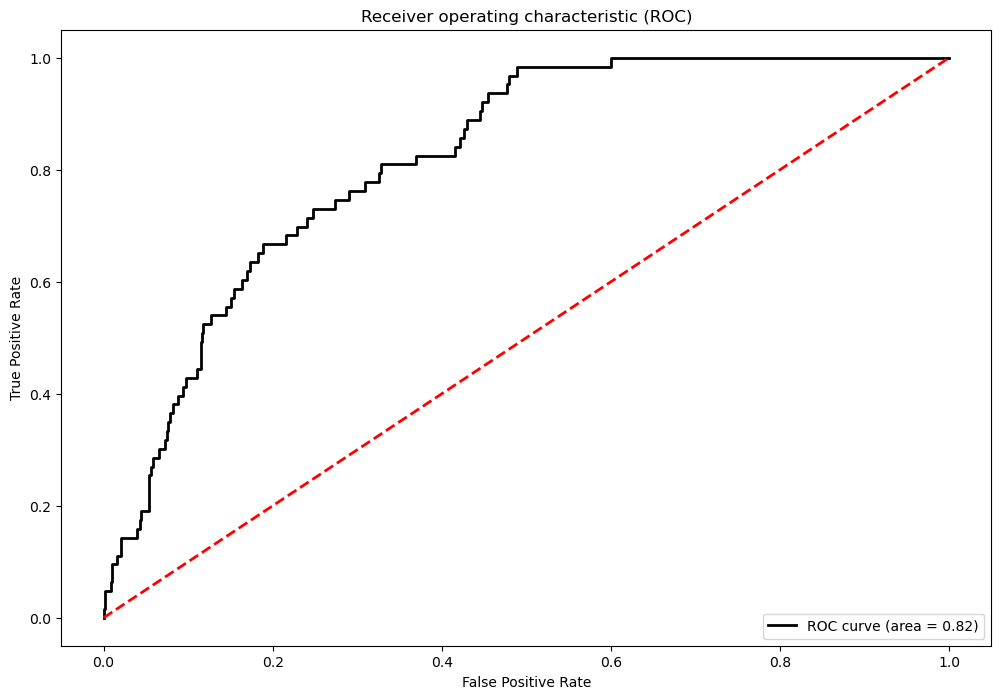

In [68]:
ROC_plot(rf_opt,X_test)

In [69]:
table

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.623656,0.630435,0.617021,0.750000
1,Decision Tree,0.607843,0.673913,0.553571,0.714286
2,Tuned Random Forest,0.97008,0.987983,0.952815,0.942182
